In [4]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
import os
os.listdir('/content')

['.config', 'fake_job_postings.csv', 'sample_data']

In [7]:
df = pd.read_csv("/content/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0.0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0.0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0


In [8]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
job_id,0
title,0
location,123
department,4321
salary_range,5762
company_profile,1517
description,0
requirements,935
benefits,2739
telecommuting,0


In [11]:
df.fillna("", inplace=True)

In [12]:
df["text"] = (
    df["title"] + " " +
    df["company_profile"] + " " +
    df["description"] + " " +
    df["requirements"]
)

df["text"].head()

,text
0,"Marketing Intern We're Food52, and we've creat..."
1,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA) Valor ...
3,Account Executive - Washington DC Our passion ...
4,Bill Review Manager SpotSource Solutions LLC i...


In [14]:
def clean_text(text):
    text = text.lower()                      # convert to lowercase
    text = re.sub(r'\d+', '', text)          # remove numbers
    text = text.translate(
        str.maketrans('', '', string.punctuation)
    )                                        # remove punctuation
    return text

In [15]:
df["text"] = df["text"].apply(clean_text)
df["text"].head()

,text
0,marketing intern were food and weve created a ...
1,customer service cloud video production seco...
2,commissioning machinery assistant cma valor se...
3,account executive washington dc our passion f...
4,bill review manager spotsource solutions llc i...


In [16]:
X = df["text"]          # input features
y = df["fraudulent"]    # target output

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [23]:
df["fraudulent"] = df["fraudulent"].replace('', 0).astype(int)

/tmp/ipython-input-3412272103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["fraudulent"] = df["fraudulent"].replace('', 0).astype(int)


In [24]:
X = df["text"]
y = df["fraudulent"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test_tfidf)

In [29]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9751643535427319


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9751643535427319

Confusion Matrix:
 [[1324    0]
 [  34   11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1324
           1       1.00      0.24      0.39        45

    accuracy                           0.98      1369
   macro avg       0.99      0.62      0.69      1369
weighted avg       0.98      0.98      0.97      1369



VISUALIZATION

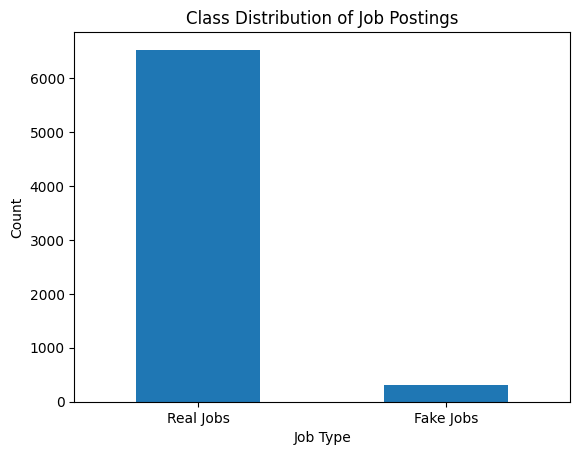

In [31]:
import matplotlib.pyplot as plt

class_counts = df["fraudulent"].value_counts()

plt.figure()
class_counts.plot(kind='bar')
plt.xticks([0, 1], ['Real Jobs', 'Fake Jobs'], rotation=0)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.title("Class Distribution of Job Postings")
plt.show()

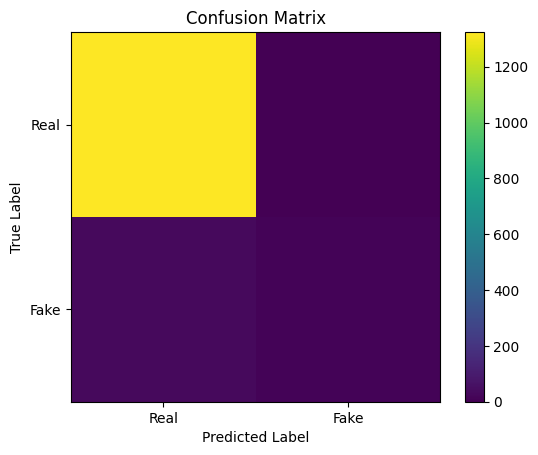

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.colorbar()
plt.xticks([0, 1], ['Real', 'Fake'])
plt.yticks([0, 1], ['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

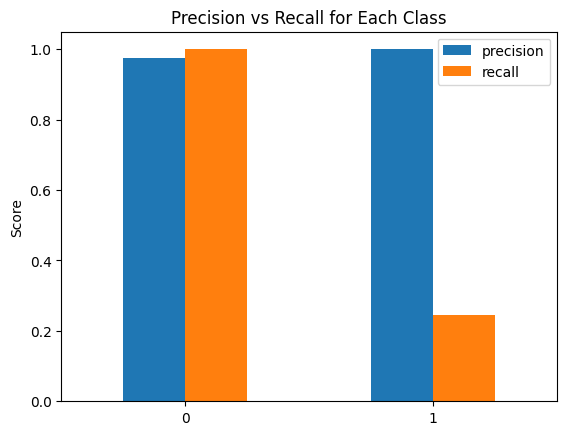

In [33]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall']].iloc[:2].plot(kind='bar')
plt.title("Precision vs Recall for Each Class")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.show()